In [2]:
import pylidc as pl
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import find_contours
from pylidc.utils import consensus
from skimage.filters import sobel

Loading dicom files ... This may take a moment.

Nodule 1:
shape cmaks(74, 79, 6)
Number of annotations: 4
Diameter: 19.50 mm, Surfuce Area: 1135.24 mm^2, Volume: 2621.82 mm^3
Number of pixeis inside the nodule: 1903
Circularity in the slice 3 of the nodule: 0.18114763751902127
Median of HU inside the nodule: -78.0
Standard variation of the HU inside the nodule: 157.18057995106673
Variance of HU inside the nodule: 24705.73471375368

Nodule 2:
shape cmaks(80, 62, 6)
Number of annotations: 4
Diameter: 20.84 mm, Surfuce Area: 1124.13 mm^2, Volume: 2439.30 mm^3
Number of pixeis inside the nodule: 1741
Circularity in the slice 3 of the nodule: 0.1533951534961265
Median of HU inside the nodule: -195.0
Standard variation of the HU inside the nodule: 226.51775866904254
Variance of HU inside the nodule: 51310.294992446594

Nodule 3:
shape cmaks(48, 42, 2)
Number of annotations: 1
Diameter: 5.08 mm, Surfuce Area: 66.91 mm^2, Volume: 62.11 mm^3
Number of pixeis inside the nodule: 34
Circularity i

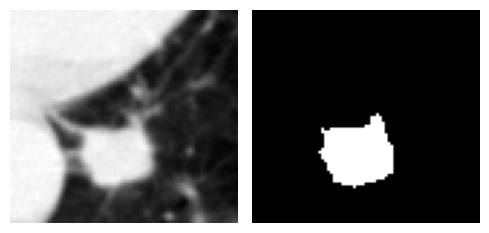

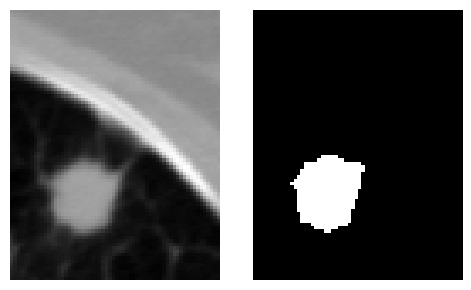

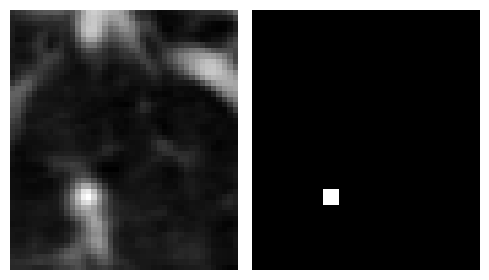

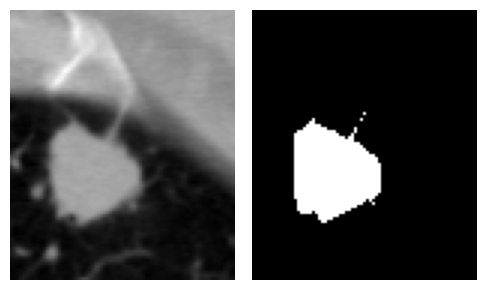

In [6]:
pid= 'LIDC-IDRI-0078'
scan= pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
nods = scan.cluster_annotations()
vol=scan.to_volume()
padding=[(30,10), (10,25), (0,0)]

n=1
print()
for anns in nods:
        #get the concensus for the contours of this nodule
        cmask,cbbox,masks=consensus(anns,clevel=0.5,pad=padding)

        #get the central slice of the computed bounding box
        k=int(0.5*(cbbox[2].stop-cbbox[2].start))

        img=vol[cbbox][:,:,k]

        print(f"Nodule {n}:")
        print(f"shape cmaks{cmask.shape}")
        print(f"Number of annotations: {len(anns)}")
        print("Diameter: %.2f mm, Surfuce Area: %.2f mm^2, Volume: %.2f mm^3" % (anns[0].diameter,
                                         anns[0].surface_area,
                                         anns[0].volume))
        


        #Calculating the number of pixeis inside a lesion
        n_pixeis_in_nodule=np.sum(cmask)
        print(f"Number of pixeis inside the nodule: {n_pixeis_in_nodule}")

        # Calculate circularity
        # the closer to 1 the closer to a perfect circle
        circularity=0
        for i in range(cmask.shape[-1]):
            area_k_slice_pixels=np.sum(cmask[:,:,i])#this way we get the number of pixeis of the k
            # Calculating the perimeter(in pixels) by appling an edge filter to the mask
            edges=sobel(cmask)
            perimeter_piexels=np.sum(edges[:,:,i])#so that we get the perimeter of the slice k of the lesion
            circularity += (4 * np.pi * area_k_slice_pixels) / (perimeter_piexels ** 2)#so that 
        print(f"Circularity in the slice {k} of the nodule: {circularity/cmask.shape[-1]}")

        #Calculate the median HU inside of the lesion
        #vol[ccbox][cmask] represents the HU inside the lesion
        median_hu_in_nodule= np.median(vol[cbbox][cmask])
        print(f"Median of HU inside the nodule: {median_hu_in_nodule}")

        #Calculate the the standard variation of HU inside the lesion
        std_hu_in_nodule=np.std(vol[cbbox][cmask])
        print(f"Standard variation of the HU inside the nodule: {std_hu_in_nodule}")

        #Calculate the variance of HU inside the nodule
        var_hu_in_nodule=np.var(vol[cbbox][cmask])
        print(f"Variance of HU inside the nodule: {var_hu_in_nodule}")





        print()
        fig,ax = plt.subplots(1,2,figsize=(5,3))
        #vol[cbbox][:,:,k]
        ax[0].imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray)
        ax[0].axis('off')

        ax[1].imshow(cmask[:,:,k], cmap=plt.cm.gray)
        ax[1].axis('off')

        plt.tight_layout()
        plt.show
        n+=1

        